In [4]:
import numpy as np
import matplotlib.pyplot as plt

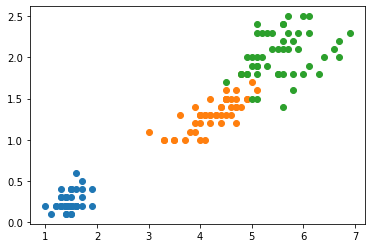

In [5]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dt_clf.fit(X, y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

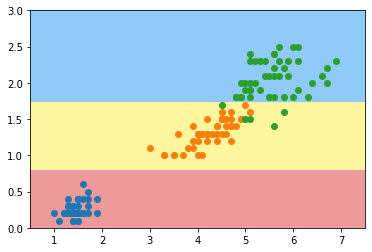

In [7]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100))
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

[Text(133.92000000000002, 181.2, 'X[1] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]')]

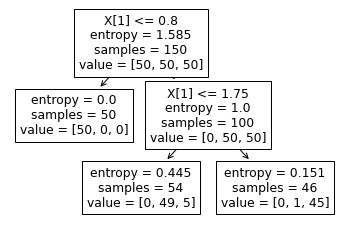

In [8]:
from sklearn import tree
tree.plot_tree(dt_clf)

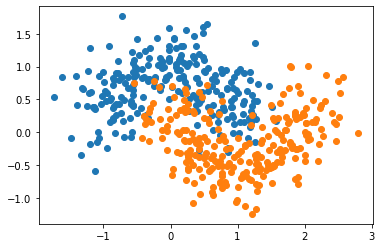

In [9]:
X,y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# Exercise0
偏差（bias）：偏差衡量了模型的预测值与实际值之间的偏离关系。
通常在深度学习中，我们每一次训练迭代出来的新模型，都会拿训练数据进行预测，
偏差就反应在预测值与实际值匹配度上，比如通常在keras运行中看到的准确度为96%，则说明是低偏差；
反之，如果准确度只有70%，则说明是高偏差.

方差（variance）：方差描述的是训练数据在不同迭代阶段的训练模型中，预测值的变化波动情况（或
称之为离散情况）。从数学角度看，可以理解为每个预测值与预测均值差的平方和的再求平均数。通常
在深度学习训练中，初始阶段模型复杂度不高，为低方差；随着训练量加大，模型逐步拟合训练数据，
复杂度开始变高，此时方差会逐渐变高。

In [10]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=300,
                                max_samples=300,
                                bootstrap=True,
                                oob_score=True)
bagging_clf.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


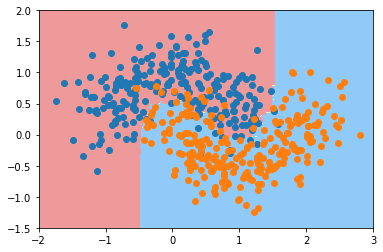

In [11]:
bagging_clf.oob_score_
plot_decision_boundary(bagging_clf, axis=[-2, 3, -1.5, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300,
                                random_state=666,
                                oob_score=True,
                                )


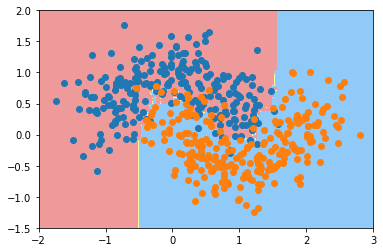

In [14]:
rf_clf.fit(X, y)
plot_decision_boundary(rf_clf, axis=[-2, 3, -1.5, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()



#Exercise2
偏差可以用来描述模型的欠拟合情况
方差可以用来描述模型的过拟合情况
